In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
#reading in webscraped data
df = pd.read_csv("epidemics.csv")

#droppping columns I don't need
df = df.drop(df.columns[[0,6]], axis=1)

#displaying data
df

,Event,Date,Location,Disease,Death toll (estimate)
0,1350 BC plague of Megiddo,1350 BC,"Megiddo, land of Canaan","Amarna letters EA 244, Biridiya, mayor of Megi...",Unknown
1,Plague of Athens,429–426 BC,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...","75,000–100,000"
2,412 BC epidemic,412 BC,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",Unknown
3,Antonine Plague,165–180 (possibly up to 190),Roman Empire,"Unknown, possibly smallpox",5–10 million
4,Jian'an Plague,217,Han Dynasty,"Unknown, possibly typhoid fever or viral hemor...",Unknown
...,...,...,...,...,...
248,2020 Nigeria yellow fever epidemic,2020,Nigeria,Yellow fever,296 (as of 31 December 2020)
249,2021 India black fungus epidemic,2021–present,India,Black fungus / COVID-19 associated mucormycosis,4332
250,2022 hepatitis of unknown origin in children,2021–present,Worldwide,Hepatitis by Adenovirus variant AF41 (Unconfir...,18
251,2022 monkeypox outbreak,2022–present,Worldwide,Monkeypox virus,136


In [63]:
#adding disease count columns
df['count'] = df.groupby('Disease')['Disease'].transform('count')



In [64]:
#changing column types
df["Death Toll"] = pd.to_numeric(df["Death toll (estimate)"], errors='coerce')
df["Disease Occurences"] = pd.to_numeric(df["count"], errors='coerce')
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

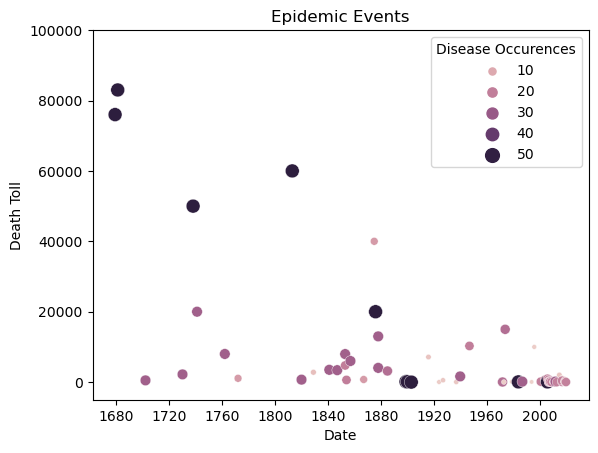

In [67]:
sns.scatterplot(x='Date', y = 'Death Toll', size = 'Disease Occurences', data = df, hue='Disease Occurences', sizes = (10,100))
plt.ylim(-5000, 100000)
plt.title("Epidemic Events")
plt.savefig('storyFigure.jpeg')